In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [14]:
donations = pd.read_csv('valid_donation.csv')

# convert timestamp to years
donations['donation_timestamp'] = donations['donation_timestamp'].apply(lambda x : x[:4])

In [6]:
new_table = donations[['_donationid', '_projectid', '_donor_acctid', 'donation_timestamp']]
#new_table['donation_timestamp'] = pd.to_numeric(new_table['donation_timestamp'])

In [7]:
group_table = new_table.sort_values('donation_timestamp').groupby(['_donor_acctid', '_projectid', 'donation_timestamp']).count()

In [8]:
# convert group table to dataframe
group_table = group_table['_donationid'].to_frame().reset_index()
group_table['donation_timestamp'] = pd.to_numeric(group_table['donation_timestamp'])
group_table = group_table.sort_values(['_donor_acctid', 'donation_timestamp'])
#group_table

In [78]:
# group_table = group_table.groupby(['_donor_acctid', '_projectid', 'donation_timestamp']).count()
# group_table.sort_values(['donation_timestamp'])

In [9]:
group_table['first_donation_time'] = group_table['donation_timestamp']
group_table['first_donation_time'] = group_table.drop_duplicates(subset=['_donor_acctid'], keep='first')['donation_timestamp']

In [10]:
group_table['first_donation_time'] = group_table['first_donation_time'].fillna(method='ffill')
#group_table

In [11]:
group_table.rename(columns={'_donationid':'count'}, inplace=True)
#group_table

In [12]:
group_table['year_start_from'] = group_table.apply(lambda row: row.donation_timestamp - row.first_donation_time + 1,axis=1)
#group_table

In [13]:
group_table['year_start_from_copy'] = group_table['year_start_from']
group_table.year_start_from_copy = group_table.year_start_from_copy.shift(-1)
group_table['diff'] = group_table['year_start_from_copy'] - group_table['year_start_from']
group_table_backup = group_table.copy()
group_table.to_csv('group_table.csv', encoding='utf-8')

In [138]:
group_table = group_table_backup

In [139]:
group_table1 = group_table.copy()
group_table2 = group_table.copy()
group_table3 = group_table.copy()

In [140]:
donor_6 = group_table1.loc[group_table1['year_start_from'] == [6]]
donor_6_list = donor_6['_donor_acctid']
donor_6_list

35         0001107b9faa5c3bb42cfcecece1d587
39         0001107b9faa5c3bb42cfcecece1d587
40         0001107b9faa5c3bb42cfcecece1d587
44         0001107b9faa5c3bb42cfcecece1d587
54         0001107b9faa5c3bb42cfcecece1d587
64         0001107b9faa5c3bb42cfcecece1d587
67         0001107b9faa5c3bb42cfcecece1d587
119        0002bcb9f69cd91cbeae163fc9cd874f
148        00039eb54d35f2104e024d21d9168f67
159        0004022cc26b79c37471e953f521d0dc
161        0004022cc26b79c37471e953f521d0dc
196        00052006c47375049337beafe2a2308b
204        00052006c47375049337beafe2a2308b
205        00052006c47375049337beafe2a2308b
206        00052006c47375049337beafe2a2308b
207        00052006c47375049337beafe2a2308b
277        00076c7103b5fe57febb9d8c04af4784
309        0008fd9f078d6226e028c427a6421143
319        0008fd9f078d6226e028c427a6421143
359        0009d6067903d91960668198f0e96536
452        000cb694f67ed35dfa63263914c80c5d
490        000e3388b46fa29a1530487b2ad80faf
495        000e3388b46fa29a15304

In [134]:
donor_2plus = group_table2.loc[group_table2['year_start_from'] >= [3]]
donor_2plus_list = donor_2plus['_donor_acctid']
donor_2plus_list

6          00008481214e948f070337066f875fb2
8          00008481214e948f070337066f875fb2
11         0000a2175753bc165e53c408589a3bd6
12         0000a2175753bc165e53c408589a3bd6
10         0000a2175753bc165e53c408589a3bd6
15         0000c14308c4cb9259a4fe51f692c9ef
17         0000c14308c4cb9259a4fe51f692c9ef
19         0000c14308c4cb9259a4fe51f692c9ef
29         0001107b9faa5c3bb42cfcecece1d587
34         0001107b9faa5c3bb42cfcecece1d587
37         0001107b9faa5c3bb42cfcecece1d587
46         0001107b9faa5c3bb42cfcecece1d587
52         0001107b9faa5c3bb42cfcecece1d587
63         0001107b9faa5c3bb42cfcecece1d587
68         0001107b9faa5c3bb42cfcecece1d587
71         0001107b9faa5c3bb42cfcecece1d587
25         0001107b9faa5c3bb42cfcecece1d587
26         0001107b9faa5c3bb42cfcecece1d587
43         0001107b9faa5c3bb42cfcecece1d587
45         0001107b9faa5c3bb42cfcecece1d587
51         0001107b9faa5c3bb42cfcecece1d587
53         0001107b9faa5c3bb42cfcecece1d587
60         0001107b9faa5c3bb42cf

In [141]:
# donor_3_table = group_table3.loc[(group_table3['_donor_acctid'].isin(donor_3_list)) and (~group_table3['_donor_acctid'].isin(donor_3plus_list))]
set_only_2 = set(set(donor_2_list.values) - set(donor_2plus_list.values))
#set_6_more = set(donor_6_list.values)
print(len(set_6_more))
table_6_more = group_table3.loc[group_table3['_donor_acctid'].isin(set_6_more)]
table_6_more
# donor_3_table = group_table3['_donor_acctid'].select(lambda row : print(row.values))

27575


,_donor_acctid,_projectid,donation_timestamp,count,first_donation_time,year_start_from,year_start_from_copy,diff
28,0001107b9faa5c3bb42cfcecece1d587,0dfd4df3f4c6204e87053cca0af10b54,2011,1,2011.0,1.0,1.0,0.0
36,0001107b9faa5c3bb42cfcecece1d587,342fd3232742ed9c2eed366d2de53569,2011,1,2011.0,1.0,1.0,0.0
55,0001107b9faa5c3bb42cfcecece1d587,ba64455e18ff1a5465724c7075c432a2,2011,1,2011.0,1.0,1.0,0.0
62,0001107b9faa5c3bb42cfcecece1d587,ca60e09cf40c7a78e3a986990b97941c,2011,1,2011.0,1.0,2.0,1.0
33,0001107b9faa5c3bb42cfcecece1d587,2efcec1f526909790a9793ce3c16dd02,2012,1,2011.0,2.0,2.0,0.0
41,0001107b9faa5c3bb42cfcecece1d587,5bf62dfc582d792c2cf69850275bd16d,2012,1,2011.0,2.0,2.0,0.0
47,0001107b9faa5c3bb42cfcecece1d587,8b1e8e103449844de9d295997336e0cc,2012,1,2011.0,2.0,2.0,0.0
48,0001107b9faa5c3bb42cfcecece1d587,9073f0d0c9b054836c2ddc24ea9691ae,2012,1,2011.0,2.0,2.0,0.0
49,0001107b9faa5c3bb42cfcecece1d587,92484ad6d83d34844664ed98a91c4cf5,2012,1,2011.0,2.0,2.0,0.0
50,0001107b9faa5c3bb42cfcecece1d587,a41150363fbe76a6f2b67de1707f3e74,2012,1,2011.0,2.0,2.0,0.0


In [40]:
bins = [0] * 18

In [39]:
count_map = group_table['year_start_from'].value_counts()
count_map

1.0     1780377
2.0      717624
3.0      343409
4.0      215750
5.0      146882
6.0       96788
7.0       60627
8.0       35545
9.0       20243
10.0      11441
11.0       6164
12.0       3120
13.0       1076
14.0        468
15.0         84
16.0         51
Name: year_start_from, dtype: int64

In [164]:
temp_uniq = group_table.groupby(['_donor_acctid', 'year_start_from', '_projectid']).count()
temp_uniq

donation_timestamp  \
_donor_acctid                    year_start_from _projectid                                             
00002eb25d60a09c318efbd0797bffb5 1.0             702f713c52b632d490f3f63b75d22a45                   1   
                                 2.0             7dae9b10d62d50a0152b93904a9c0813                   1   
0000584b8cdaeaa6b3de82be509db839 1.0             6be48e411952ebdf78e2d00e87b08ad6                   1   
00005f52c98eeaf92b2414a352b023a4 1.0             75ad8c8c18c370b8e1f829d2887a3b0b                   1   
                                 2.0             1e86803ae2a4fc9831712f6e2a4c0a5f                   1   
00008481214e948f070337066f875fb2 1.0             7dccf506dd8cff34827a45098db2caa5                   1   
                                 2.0             9e7880176f39dcd8c8af09cea7bf45ab                   1   
                                 3.0             83b9516233c913356685cfc611410cbb                   1   
                                                 bc7498f120943cd139d60056552311ef                   1   
0000a2175753bc165e53c408589a3bd6 1.0             c19a50f73ee2884039834cbf2d861b22                   1   
                                 2.0             203c2e39d62467dce3894935fa0719f5                   1   
                                 3.0             9ed2f35a76532840c8e52d376ff5f59e                   1   
                                 4.0             b154f07c62b5fdce4e5abecaee2035fd                   1   
                                 5.0             2fc5b57c1a29c7489b182e8c49c0621b                   1   
0000a9af8b6b9cc9e41f53322a8b8cf1 1.0             277a1896f63d4b932100bd3855e223be                   1   
0000c14308c4cb9259a4fe51f692c9ef 1.0             34ad7bd99521b6a809fc0f4145ea9333                   1   
                                                 6b69a5536af46b761224e3c10fd8488d                   1   
                                                 b8a81662a8901035cc8df1a2d70a7cad                   1   
                                 3.0             079991dfd20485772a39dcb52b58179f                   1   
                                                 63822333fb2919ba219c319654f610e8                   1   
                                 4.0             9811aaa5290f9c21f39495bbcc261c7c                   1   
0000cff17c117a02813740c93dc33507 1.0             3fb9b76be488b63566574999f4d8976c                   1   
                                                 d1495a1846a2c7db8307fae391f03077                   1   
00010615b56ff057fa00b5144fe2e4cf 1.0             82bc4abc28c8536ff58424baa8787579                   1   
                                 2.0             50751655c488db95985f464e99a84a56                   1   
0001107b9faa5c3bb42cfcecece1d587 1.0             0dfd4df3f4c6204e87053cca0af10b54                   1   
                                                 342fd3232742ed9c2eed366d2de53569                   1   
                                                 ba64455e18ff1a5465724c7075c432a2                   1   
                                                 ca60e09cf40c7a78e3a986990b97941c                   1   
                                 2.0             2efcec1f526909790a9793ce3c16dd02                   1   
...                                                                                               ...   
fffed4187f3b5f17cb58536f7fac8dee 4.0             f69949982aaf862f30d2951d82730571                   1   
ffff337f821f8b728e600dbcd09b0c5a 1.0             94326b11b69935f5010f8c4c02e7fe09                   1   
                                                 ce261c6dbd64a86e1392b6cdc8d187d5                   1   
                                 2.0             4335df11739a2bd7f5e81abe1676e161                   1   
                                                 46292d47fd9514b73960e7dcd9abf6be                   1   
ffff4519d32caac1bb44f1d936026daf 1.0             18f0dca46eab540c6051836257d20091            

In [43]:
temp = group_table.groupby(['_donor_acctid', 'year_start_from']).count()
temp

_projectid  \
_donor_acctid                    year_start_from               
00002eb25d60a09c318efbd0797bffb5 1.0                       1   
                                 2.0                       1   
0000584b8cdaeaa6b3de82be509db839 1.0                       1   
00005f52c98eeaf92b2414a352b023a4 1.0                       1   
                                 2.0                       1   
00008481214e948f070337066f875fb2 1.0                       1   
                                 2.0                       1   
                                 3.0                       2   
0000a2175753bc165e53c408589a3bd6 1.0                       1   
                                 2.0                       1   
                                 3.0                       1   
                                 4.0                       1   
                                 5.0                       1   
0000a9af8b6b9cc9e41f53322a8b8cf1 1.0                       1   
0000c14308c4cb9259a4fe51f692c9ef 1.0                       3   
                                 3.0                       2   
                                 4.0                       1   
0000cff17c117a02813740c93dc33507 1.0                       2   
00010615b56ff057fa00b5144fe2e4cf 1.0                       1   
                                 2.0                       1   
0001107b9faa5c3bb42cfcecece1d587 1.0                       4   
                                 2.0                       8   
                                 3.0                       8   
                                 4.0                      10   
                                 5.0                      11   
                                 6.0                       7   
00011c48767cf67073b1f3bcc91dc7dc 1.0                       1   
                                 2.0                       1   
0001415ef50c0f45d066c97e69489c1f 1.0                       1   
                                 4.0                       1   
...                                                      ...   
fffdd82d755de73c63ea2624c652dfa2 1.0                       1   
                                 2.0                       1   
fffe0b6ab566b2408e637ef6c18853b5 1.0                       2   
fffe4a17e9062678b553a4d5778c6702 1.0                       1   
                                 2.0                       2   
fffe56ecd1382490b5995a308d9476d9 1.0                       3   
                                 2.0                       3   
fffeb06eb87c9f8353c3bd4899ee1295 1.0                       2   
                                 3.0                       1   
fffed4187f3b5f17cb58536f7fac8dee 1.0                       2   
                                 4.0                       4   
ffff337f821f8b728e600dbcd09b0c5a 1.0                       2   
                                 2.0                       2   
ffff4519d32caac1bb44f1d936026daf 1.0                       2   
ffff486ac82bf347e51e39f5a72af66d 1.0                       2   
                                 3.0                       1   
                                 5.0                       1   
ffff4d8dadd5e8848fefe2a6c52daac9 1.0                       1   
                                 2.0                       2   
                                 3.0                       1   
ffff6ee95aca73ee8ce9da773bb28979 1.0                       2   
                                 2.0                       1   
ffff7983450a8a142dd650e09e73b4ca 1.0                       1   
                                 2.0                       1   
ffff8bee61b72c484b10e43aa9e35bc9 1.0                       1   
ffff8e040521f62207881376ecc964d5 1.0                       2   
ffff987723f59cf47b03d2768a2e8b93 1.0                       3   
ffffad3f78f2b13ce571c709dd049cd3 1.0                       1   
                                 2.0                       1   
ffffcae1ab28c7d35678918a22abb335 1.0                       2   

                 

In [49]:
temp = temp.reset_index()
print(temp)
print(temp['year_start_from'])
donor_count = temp['year_start_from'].value_counts()
donor_count

                            _donor_acctid  year_start_from  _projectid  \
0        00002eb25d60a09c318efbd0797bffb5              1.0           1   
1        00002eb25d60a09c318efbd0797bffb5              2.0           1   
2        0000584b8cdaeaa6b3de82be509db839              1.0           1   
3        00005f52c98eeaf92b2414a352b023a4              1.0           1   
4        00005f52c98eeaf92b2414a352b023a4              2.0           1   
5        00008481214e948f070337066f875fb2              1.0           1   
6        00008481214e948f070337066f875fb2              2.0           1   
7        00008481214e948f070337066f875fb2              3.0           2   
8        0000a2175753bc165e53c408589a3bd6              1.0           1   
9        0000a2175753bc165e53c408589a3bd6              2.0           1   
10       0000a2175753bc165e53c408589a3bd6              3.0           1   
11       0000a2175753bc165e53c408589a3bd6              4.0           1   
12       0000a2175753bc165e53c408589a3

1.0     597914
2.0     232931
3.0     119969
4.0      73352
5.0      44590
6.0      27575
7.0      15320
8.0       7839
9.0       4431
10.0      2323
11.0      1027
12.0       508
13.0       248
14.0       115
15.0        17
16.0         6
Name: year_start_from, dtype: int64

In [50]:
mean = count_map / donor_count
mean

1.0     2.977647
2.0     3.080844
3.0     2.862481
4.0     2.941297
5.0     3.294057
6.0     3.509991
7.0     3.957376
8.0     4.534379
9.0     4.568495
10.0    4.925097
11.0    6.001947
12.0    6.141732
13.0    4.338710
14.0    4.069565
15.0    4.941176
16.0    8.500000
Name: year_start_from, dtype: float64

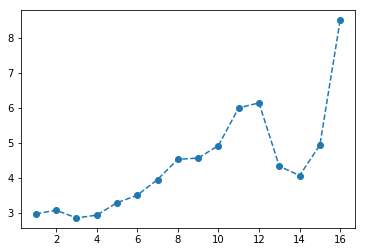

In [59]:
mean.plot(x=mean.index, y=mean.values, marker='o', linestyle='--')
# yerr = 2
#mean.errorbar(x=mean.index, y=mean.values)

In [142]:
tmp1 = table_6_more['year_start_from'].value_counts()
tmp2 = table_6_more.groupby(['_donor_acctid', 'year_start_from']).count().reset_index()['year_start_from'].value_counts()
mean1 = tmp1 / tmp2
mean1

1.0      2.553073
2.0      5.528381
3.0      5.633570
4.0      6.257707
5.0      6.158663
6.0      3.509991
7.0      6.054356
8.0      6.950723
9.0      6.949978
10.0     7.316476
11.0     8.368421
12.0     7.933754
13.0     5.390071
14.0     6.017544
15.0     7.875000
16.0    21.000000
Name: year_start_from, dtype: float64

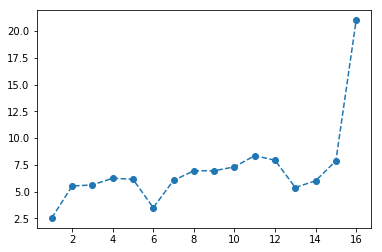

In [143]:
mean1.plot(x=mean1.index, y=mean1.values, marker='o', linestyle='--')